# High mapping quality properly paired read pairs overlapping the 5' end of XDP SVA and flanking genome

Here is figure 1 from:

Bragg et al. 2017. Disease onset in X-linked dystonia-parkinsonism correlates with expansion of a hexameric repeat within an SVA retrotransposon in TAF1

https://www.pnas.org/content/114/51/E11020.long

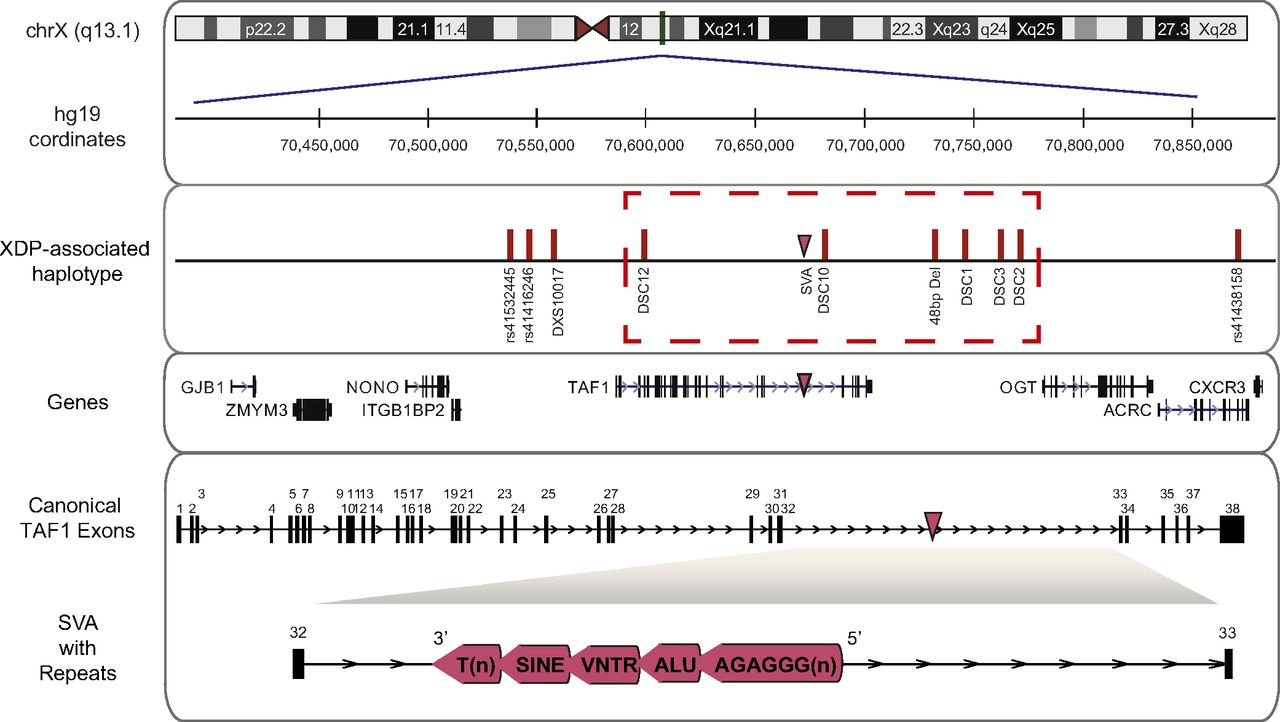


In this notebook we look at read pairs from XDP, control and carrier -derived organoids that:

- are properly paired
- at least one read of the pair maps uniquely to the genome
- at least one read of the pair overlaps the 5' half of XDP SVA chrX:(71440513 + 1300),(71443140 - 20)
- at least one read of the pair overlaps the genome outside XDP SVA


We see that:
- a few read pairs from XDP and carrier -derived organoids  overlap the 5'h+examer part of SVA and read into the flanking genome.
- no such reads are present in control -derived organoids from the XDP project.
- no such reads are present in control -derived organoids from Tomoyo's SETD1A project.



Authors: Arthur Feltrin and Apuã Paquola

In [1]:
import pandas as pd
import pysam
import itertools
from plotnine import *
from IPython.display import Image


In [2]:
def get_xdp_sva_proper_pairs(filename):
    chrX_len = 156043522
    
    with pysam.AlignmentFile(filename, 'rb') as samfile:
        for k,g in itertools.groupby(samfile, key=lambda x: x.query_name):
            # Output all alignments of read pair if at least one mate overlaps XDP SVA
            l = list(g)
            if any(not read.is_unmapped 
                   and read.is_proper_pair
                   and read.mapping_quality == 60
                   and read.reference_name == 'chrX' 
                   # Get reads overlaping the  5' half of (note that SVA is inverted in the genome, so we get the second half of the SVA in the genome)
                   and read.get_overlap(71440513 + 1300, 71443140 - 20) > 0 
                   for read in l):
                
                pair = [read for read in l if not read.is_secondary and not read.is_supplementary]
                
                if len(pair)==2 and \
                    (pair[0].mapping_quality == 60 or pair[1].mapping_quality == 60) \
                    and ( (pair[0].get_overlap(0, 71440513 - 10) > 0  \
                           or pair[0].get_overlap(71443140 + 10, chrX_len) > 0 \
                           or pair[1].get_overlap(0, 71440513 - 10) > 0  \
                           or pair[1].get_overlap(71443140 + 10, chrX_len) > 0 \
                           )):
                    if pair[0].is_read1:
                        yield pair[0], pair[1]
                    else:
                        yield pair[1], pair[0]
                    


In [3]:
#for x in get_xdp_sva_proper_pairs('/ceph/projects/tomoyo_SETD1A_bulk_RNA-seq/fastq/test_hisat2_with_xdp_sva_filter/_m/LIBD7c6_CA137_69_CO_d12.bam'):
#    print(x[0])
#    print(x[1])
#    print()
        

In [4]:
metadata_df = pd.read_csv('/ceph/projects/xdp_striatal_organoids_RNA-seq/metadata/_m/XDP_striatal_organoids_metadata.csv')
metadata_df = metadata_df.rename({'Sample': 'sample_id'},axis=1)
metadata_df.head(5)

,Differentiation_cohort,sample_id,iPSC_line,Cell_line,Sex,Day_of_Maturation,RIN,Kit,Disease_Status,individual
0,A,1N,33113.2I,Control,Male,30,8.7,Zymo_R2062,healthy,33113
1,A,2N,33109.2G,XDP,Male,30,8.0,Zymo_R2062,patient,33109
2,A,3N,33109.2G-1A4,DELTA-SVA-XDP,Male,30,9.0,Zymo_R2062,healthy,33109
3,A,4N,33109.2G-2F2,DELTA-SVA-XDP,Male,30,8.8,Zymo_R2062,healthy,33109
4,A,5N,33113.2I,Control,Male,60,7.6,Zymo_R2062,healthy,33113


In [5]:
def get_properly_pairs_mapping_in_and_out_of_xdp_sva():

    print('High mapping quality properly paired read pairs overlapping XDP SVA and flanking genome')
    print()
    
    for m in metadata_df.itertuples():
        filename = f"../../_m/{m.sample_id}.bam"
        print(f"\n\n###########################\nSample_id: {m.sample_id}\nCell line: {m.Cell_line}\n")
        
        try:
            pp = list(get_xdp_sva_proper_pairs(filename))
            
            for x in pp:
                print(x[0])
                print(x[1])
                print()
            
            yield {'sample_id': m.sample_id, 'npairs': len(pp)}
        
        except:
            print(f'could not read bam for {m.sample_id}')
        


In [6]:
npairs_df = pd.DataFrame(get_properly_pairs_mapping_in_and_out_of_xdp_sva())

High mapping quality properly paired read pairs overlapping XDP SVA and flanking genome



###########################
Sample_id: 1N
Cell line: Control



###########################
Sample_id: 2N
Cell line: XDP

A00744:205:H3JHHDSX2:2:1352:19642:37012	83	#22	71443119	60	151M	#22	71443102	-168	AGCTATTTCATTTTTTTTTTTTCCACATCAGATGTGGAAAAAAAATGTACTGGCATTGTAATAAGGCTTGAGGGAGGCACATCTCACACATGAACGTGAAAACCCAATGTCGTCACACTTACGTCATCATAAGCTTATGAACTACAAAAAG	array('B', [25, 25, 37, 37, 37, 37, 37, 37, 11, 37, 37, 37, 25, 37, 25, 37, 37, 37, 37, 37, 37, 37, 37, 25, 37, 37, 37, 37, 25, 37, 25, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 25, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 11, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 25, 37, 37, 37, 11, 25, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 25, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 25, 37, 37, 37, 37, 37, 37, 25, 37, 11, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 11, 37, 37, 37, 37, 37, 37, 37, 37, 25, 37, 37, 37, 3

[E::idx_find_and_load] Could not retrieve index file for '../../_m/1N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/2N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/3N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/4N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/5N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/6N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/7N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/8N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/9.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/53R.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/11N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/12N.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../_m/13N.bam'
[E::idx_find_and_load]

In [7]:
df = npairs_df.merge(metadata_df)
df

,sample_id,npairs,Differentiation_cohort,iPSC_line,Cell_line,Sex,Day_of_Maturation,RIN,Kit,Disease_Status,individual
0,1N,0,A,33113.2I,Control,Male,30,8.7,Zymo_R2062,healthy,33113
1,2N,1,A,33109.2G,XDP,Male,30,8.0,Zymo_R2062,patient,33109
2,3N,0,A,33109.2G-1A4,DELTA-SVA-XDP,Male,30,9.0,Zymo_R2062,healthy,33109
3,4N,0,A,33109.2G-2F2,DELTA-SVA-XDP,Male,30,8.8,Zymo_R2062,healthy,33109
4,5N,0,A,33113.2I,Control,Male,60,7.6,Zymo_R2062,healthy,33113
5,6N,0,A,33109.2G,XDP,Male,60,7.6,Zymo_R2062,patient,33109
6,7N,0,A,33109.2G-1A4,DELTA-SVA-XDP,Male,60,6.9,Zymo_R2062,healthy,33109
7,8N,0,A,33109.2G-2F2,DELTA-SVA-XDP,Male,60,6.5,Zymo_R2062,healthy,33109
8,9,0,A,33113.2I,Control,Male,90,6.2,Zymo_R2062,healthy,33113
9,53R,0,A,33109.2G,XDP,Male,90,7.1,Zymo_D7005,patient,33109


In [8]:
# Code for unpaired reads
#
#for y in [x for x in l if not x.is_proper_pair and x.mapping_quality == 60]:
#    print(y)
   

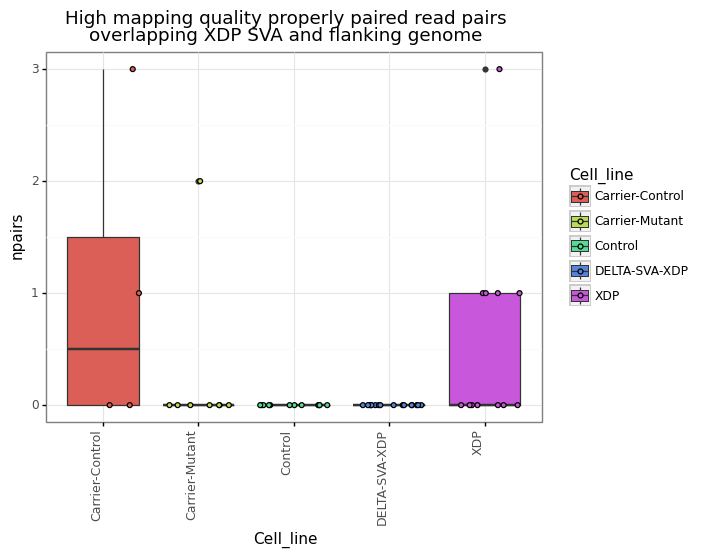

<ggplot: (8739204677479)>

In [9]:

p = ( ggplot(df, aes(x='Cell_line', y='npairs', fill = 'Cell_line'))
 + geom_boxplot()
 + geom_jitter(height = 0)    
 + theme_bw()
# + facet_grid('. ~ Cell_line')
# + facet_wrap('Cell_line')
 + theme(axis_text_x  = element_text(angle = 90, hjust = 1, size = 9))
# + theme(axis_text_x  = element_blank())
 + ggtitle('High mapping quality properly paired read pairs\noverlapping XDP SVA and flanking genome')
)

p

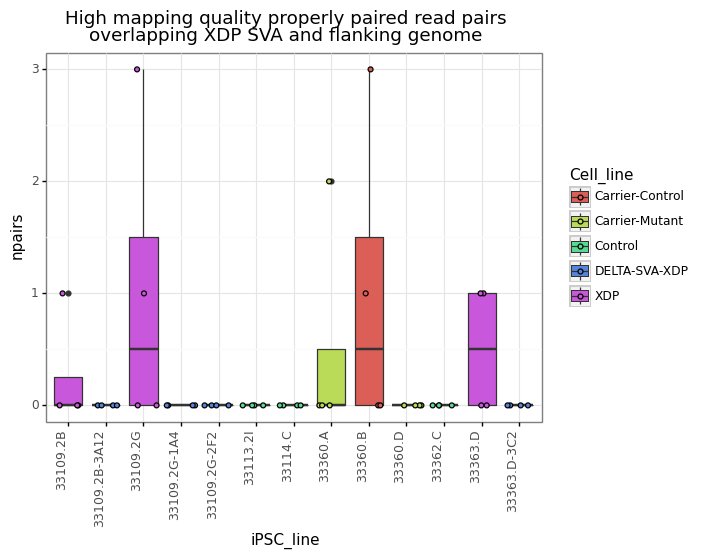

<ggplot: (8739206667271)>

In [10]:

p = ( ggplot(df, aes(x='iPSC_line', y='npairs', fill = 'Cell_line'))
 + geom_boxplot()
 + geom_jitter(height = 0)    
 + theme_bw()
# + facet_grid('. ~ Cell_line')
# + facet_wrap('Cell_line')
 + theme(axis_text_x  = element_text(angle = 90, hjust = 1, size = 9))
# + theme(axis_text_x  = element_blank())
 + ggtitle('High mapping quality properly paired read pairs\noverlapping XDP SVA and flanking genome')
)

p

In [11]:
import glob
import os

def get_tomoyo_proper_pairs_mapping_in_and_out_of_xdp_sva():

    print('High mapping quality properly paired read pairs overlapping XDP SVA and flanking genome')
    print()
    
    for filename in glob.glob('/ceph/projects/tomoyo_SETD1A_bulk_RNA-seq/fastq/test_hisat2_with_xdp_sva_filter/_m/*.bam'):
        sample_id = os.path.basename(filename)[:-4]
        print(f"\n\n###########################\nSample_id: {sample_id}\nCell line: Tomoyo\n")
        
        try:
            pp = list(get_xdp_sva_proper_pairs(filename))
            
            for x in pp:
                print(x[0])
                print(x[1])
                print()
            
            yield {'sample_id': sample_id, 'npairs': len(pp)}
        
        except:
            print(f'could not read bam for {sample_id}')
            pass
        

df2 =  pd.DataFrame( get_tomoyo_proper_pairs_mapping_in_and_out_of_xdp_sva ())

High mapping quality properly paired read pairs overlapping XDP SVA and flanking genome

